In [38]:
from functions import *
import matplotlib.pyplot as plt

# Defining the parameters

In [64]:
# defining the parameters
ontology_path = "./ontologies/transportation.owl"
onto_path.append("./ontologies/")
#ontology_path = "./ontologies/TalentaBase.owl"
#starting_class = "Asset" # set to none to start at ontology root
starting_class = None

image_size = 512 # size of rendered images in pixels 512
batch_size = 12 # number of pictures to take

# cars
#obj_filename = "data/Jeep_Renegade_2016_obj/Jeep_Renegade_2016.obj"
#obj_filename = "data/subaru/_Subaru-Loyale.obj"
#obj_filename = "data/suv/car.obj"
#obj_filename = "data/sport/low_poly_car_obj.obj"
#obj_filename = "data/lowpolycar/CARMODEL.obj"

# helicopters
#obj_filename = "data/OH-58D/OH-58D.obj"
#obj_filename = "data/heli/raven.obj"
#obj_filename = "data/uh60/uh60.obj"
#obj_filename = "data/412/412.obj"
#obj_filename = "data/v22/v22.obj"

# planes
#obj_filename = "data/FA-18F/FA-18F.obj"
#obj_filename = "data/Su-34/Su-34.obj"
obj_filename = "data/bf109/Bf109G.obj"
#obj_filename = "data/jet/plane.obj"
#obj_filename = "data/airbus/caravelle.obj"

# trains
#obj_filename = "data/electrictrain/electrictrain.obj"
#obj_filename = "data/old/train.obj"
#obj_filename = "data/tram/train.obj"
#obj_filename = "data/wap7/WAP7.obj"
#obj_filename = "data/lowpolytrain/lowpoly_train.obj"


# tracks
#obj_filename = "data/railway/Rotaia.obj"


# bridges
#obj_filename = "data/bridge/bridge.obj"
#obj_filename = "data/longbridge/bridge.obj"


# Multi-View Rendering

Center: [0.0493164  1.3834814  0.77531844]
Radius: 5.872433662414551
--------------------------
Bounding Sphere duration: 0.7068641185760498 seconds
--------------------------
We have 17293 vertices and 32530 faces.
--------------------------
Rendering Images duration: 101.46090793609619 seconds
--------------------------
--------------------------
Total Batch_: 102.16777205467224 seconds
--------------------------


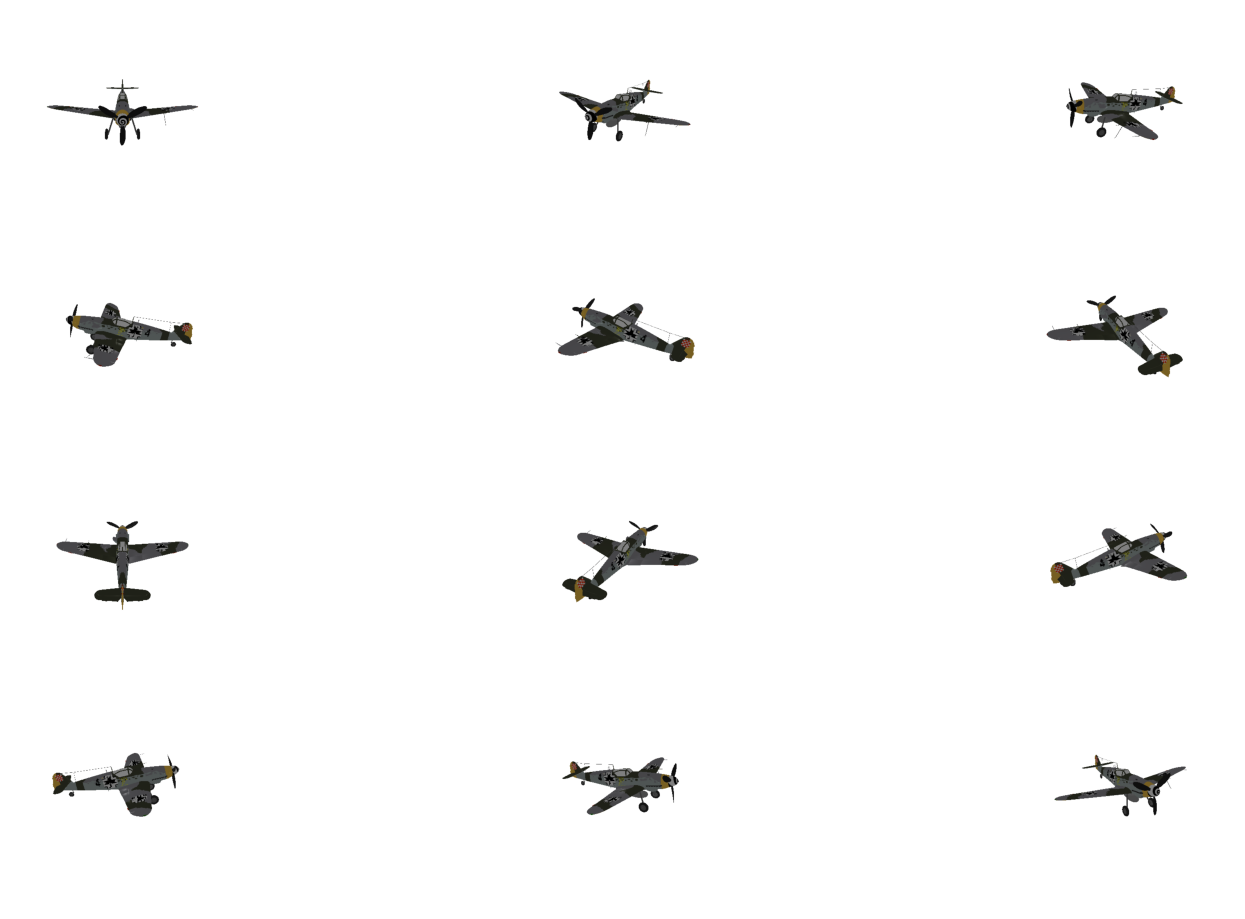

In [65]:
images = batch_render(obj_filename, image_size, batch_size)

# Batch-Predictions using the ontology

In [57]:
predictions_class_list, predictions_value_list = predict_batch_ontology(images, ontology_path, starting_class=starting_class)
D = computeSums(predictions_class_list, predictions_value_list)
print(D)
max_class = max(D, key=D.get)
print("It's a {}".format(max_class))

-------------------
image index: 0
Car
0.9998470544815063
-------------------
--------------------------
Duration of CLIP predictions for 1 images: 14.180446147918701 seconds
--------------------------
{'Car': 0.9998470544815063}
It's a Car


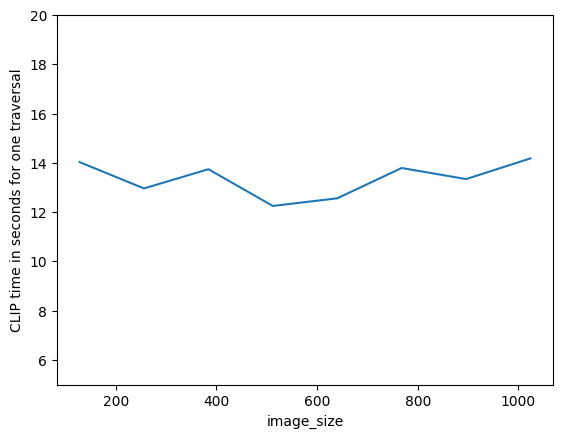

In [63]:
# plotting the 
image_size = [128, 256, 384, 512, 640, 768, 896, 1024]
CLIP_time = [14.03, 12.96, 13.74, 12.25, 12.56, 13.79, 13.34, 14.18]
plt.plot(image_size, CLIP_time)
plt.ylabel('CLIP time in seconds for one traversal')
plt.xlabel('image_size')
plt.ylim(5, 20)
#plt.show()
plt.savefig("fig1.png")

# Example of predicting a Class Property

In [5]:
pred = predict_Vehicle_data_properties(images[1], ontology_path, max_class)

In [6]:
pred

{'red': 0.006960888858884573,
 'blue': 0.005558941978961229,
 'green': 0.029050542041659355,
 'yellow': 0.0020147867035120726,
 'white': 0.5801321864128113,
 'silver': 0.09271542727947235,
 'black': 0.2835671603679657}

In [7]:
max_color = max(pred, key=pred.get)
print(max_color)

white


# Creating the instance

In [8]:
instance_name = createInstance(ontology_path, obj_filename, max_class)

Created instance transportation.Car_6 in the ontology


# Setting the color property for a Vehicle

In [9]:
setColorProperty(ontology_path, instance_name, color_name)

# Run all at once for 3D object

In [ ]:
# multiview-rendering
images = batch_render(obj_filename, image_size, batch_size)

# batch-prediction using ontology
predictions_class_list, predictions_value_list = predict_batch_ontology(images, ontology_path, starting_class=starting_class)
D = computeSums(predictions_class_list, predictions_value_list)
print(D)
max_class = max(D, key=D.get)
print("It's a {}".format(max_class))

# instance creation
instance_name = createInstance(ontology_path, obj_filename, max_class)